# Lesson 8

+ data manipulation
+ data visualization

### Euclidean distance between two 1-D set of observations

Write a subprogram that receives in input two lists of observations, u and v, and computes the Euclidean distance, 
computed as:

$$\sqrt{\sum_{i=1}^{} w_i|u_i - v_i|^{2})}$$


In [2]:
def euclideandistance(observ1, observ2):
    size = len(observ1)
    tot = 0
    for i in range(0, size):
        tot += abs(observ1[i] - observ2[i])**2
    dist = tot**(1/2)
    return dist

o1 = [0,1,0,1]
o2 = [1,1,1,1]

d = euclideandistance(o1, o2)
print(d)


1.4142135623730951


In [3]:
def euclideandistance(observ1, observ2):
    size = len(observ1)
    tot = 0
    for i in range(0, size):
        tot += abs(observ1[i] - observ2[i])**2
    dist = tot**(1/2)
    return dist

o1 = [0,1,0,1]
o2 = [1,0,0,0]

d = euclideandistance(o1, o2)
print(d)


1.7320508075688772


In [21]:
### add weigths
def euclideandistanceweight(observ1, observ2, weights=None):
    size = len(observ1)
    tot = 0
    for i in range(0, size):
        tot += weights[i]*abs(observ1[i] - observ2[i])**2
    dist = tot**(1/2)
    return dist

o1 = [0,1,0,1]
o2 = [1,1,1,1]

d = euclideandistance(o1, o2)
print(d)


1.4142135623730951


### Manhattan (city block) distance between two 1-D set of observations

Write a subprogram that receives in input two lists of observations, u and v, and computes the Manhattan distance, 
computed as:
    
$$\sum_{i=1}^{} |u_i - v_i|$$


In [17]:
def manhattandistance(observ1, observ2):
    size = len(observ1)
    tot = 0
    for i in range(0, size):
        tot += abs(observ1[i] - observ2[i])
    dist = tot
    return dist

o1 = [0,1,0,1]
o2 = [1,1,7,1]

d = manhattandistance(o1, o2)
print(d)


8


## Hamming distance between two 1-D set of observations

Write a subprogram that receives in input two lists of observations, u and v, and computes the Hamming distance, computed as:

$$\sum_{i=1}{} (u_i \neq v_i)$$

In [16]:
def hammingdistance(observ1, observ2):
    size = len(observ1)
    tot = 0
    for i in range(0, size):
        if observ1[i] != observ2[i]:
            tot += 1
    dist = tot
    return dist

o1 = [0,1,0,8]
o2 = [1,1,1,0]

d = hammingdistance(o1, o2)
print(d)

3


## Cosine distance
Write a subprogram that receives in input two lists of observations, u and v, and computes the cosine distance, computed as:

$$1 - \frac{\sum_{i=1}{} u_i v_i}{\sqrt{\sum_{i=1}{} u_i^{2}} \sqrt{\sum_{i=1}{} v_i^{2}}}$$

In [30]:
def cosinedistance(observ1, observ2):
    size = len(observ1)
    tot = 0
    o1sq = 0
    o2sq = 0
    for i in range(0, size):
        tot += observ1[i] * observ2[i]
        o1sq += observ1[i]*observ1[i]
        o2sq += observ2[i]*observ2[i]
    dist = 1 - tot / ((o1sq**(1/2))*(o2sq**(1/2)))
    return dist

o1 = [100,1,0,0]
o2 = [0,1,0,0]

d = cosinedistance(o1, o2)
print(d)

0.9900004999625032


## Distance
Write a subprogram that receives in input two set of observations, and the specification of the distance metric to be adopted and returns the computed corresponding metric.
Possible values for metric are: euclidean, manhattan, hamming, cosine

In [20]:
def distance(observ1, observ2, metric):
    if metric == 'euclidean':
        dis = euclideandistance(observ1, observ2)
    elif metric == 'manhattan':
        dis = manhattandistance(observ1, observ2)
    elif metric == 'hamming':
        dis = hammingdistance(observ1, observ2)
    elif metric == 'cosine':
        dis = cosinedistance(observ1, observ2)
    else:
        print('unsupported metric')
        dis = None
    return dis

o1 = [0,1,0,8]
o2 = [1,1,1,0]

d = distance(o1, o2, 'manhattana')
print(d)
        

unsupported metric
None


# Temperature smoothing
Write a program that loads the temperatures sampled for two months every 30 minutes from sensors located in a room where experiments are carried out. There might be missing / extra data in the sampled information, so a preliminary clean-up of the data is necessary, to make sure there is one sample every 30 minutes. When anomalies are found:
* if a sample is missing, a value is created for the missing timestamp, with a value that is the average of the previous and subsequent values
* if there is more than a sample at a time, values are replaced by a single value for that timestamp, averaged on the available redundant values


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
%matplotlib inline

SAMPLEFREQ = 30 * 60   #30 minutes = 30 * 60 seconds
SAMPLEPERDAY = 24 * 2

df2016 = pd.read_csv("201612.csv")
df2017 = pd.read_csv("201701.csv")
# 01/12/16.  00:30:00

df = pd.concat([df2016, df2017])
df['timestamp'] = df['date'] + " " + df['time']
df

,date,time,temperature,sensor,room,board,timestamp
0,01/12/16,00:00:00,5.325,5,1,3,01/12/16 00:00:00
1,01/12/16,00:30:00,5.293,5,1,3,01/12/16 00:30:00
2,01/12/16,01:00:00,3.549,5,1,3,01/12/16 01:00:00
3,01/12/16,01:30:00,5.161,5,1,3,01/12/16 01:30:00
4,01/12/16,02:00:00,6.917,5,1,3,01/12/16 02:00:00
...,...,...,...,...,...,...,...
1478,31/01/17,21:30:00,20.320,5,1,3,31/01/17 21:30:00
1479,31/01/17,22:00:00,20.320,5,1,3,31/01/17 22:00:00
1480,31/01/17,22:30:00,20.320,5,1,3,31/01/17 22:30:00
1481,31/01/17,23:00:00,20.964,5,1,3,31/01/17 23:00:00


The concatenation of date and time does not make it a real "date" ... needs fixing

In [57]:
min(df.timestamp)

fday = min(df.timestamp)
lday = max(df.timestamp)

fday, lday

('01/01/17 00:00:00', '31/12/16 23:30:00')

There is a function converting a string (str) into a time
`datetime.datetime.strptime`

In [56]:
bday = '01/01/17 00:00:00'
bday_date = datetime.datetime.strptime(bday, '%d/%m/%y %H:%M:%S')

bday_date

datetime.datetime(2017, 1, 1, 0, 0)

We need to apply it to the entire column

In [4]:
df.timestamp = df.timestamp.apply(lambda x: datetime.datetime.strptime(x, '%d/%m/%y %H:%M:%S'))

fday = min(df.timestamp)
lday = max(df.timestamp)

#further information on the smapling windows
datediff = lday - fday
fday, lday, datediff

if datediff.seconds == 0:
    ndays = datediff.days
else:
    ndays = datediff.days + 1

nsamples = ndays * SAMPLEPERDAY - 1 #ends @ 31/01/2017 23:30

**Creating a new dataframe with one sample per timestamp, according to the rules **

_approach 1_

In [105]:
ds = pd.DataFrame()
ts = fday
while (ts <= lday):
    # ts is equal to 01/12/2016 00:00
    rows = df.loc[df.timestamp == ts, ['temperature']]
    nreadings = len(rows)
    if nreadings == 1:     #if there is one readings, take it
        ds = ds.append([[ts, rows.iloc[0].temperature]])
    elif nreadings > 1:   #too many readings
        ds = ds.append([[ts, rows.temperature.mean()]])
    else: # no readings
        ds = ds.append([[ts, np.nan]])
    ts = ts + datetime.timedelta(0, SAMPLEFREQ)  #next timestamp
ds = ds.rename(columns={0: "ts", 1: "temperature"})

_approach 2_

In [5]:
ts_index = pd.date_range(fday, lday, freq='30min')
dst = pd.DataFrame(ts_index, columns=['ts'])
nrows = len(dst)
dst['temperature'] = np.nan
for i in range(0, nrows):
    rows = df.loc[df.timestamp == dst.iloc[i].ts, ['temperature']]
    nreadings = len(rows)
    if nreadings == 1:     #if there is one readings, take it
        dst.at[i,'temperature'] = rows.iloc[0].temperature
    elif nreadings > 1:   #too many readings
        dst.at[i,'temperature'] = rows.temperature.mean()
#aa.reindex(ts_index)

**there are missing values ... we keep them at present**

In [6]:
dst[dst.temperature.isna()]

,ts,temperature
2191,2017-01-15 15:30:00,NaN
2192,2017-01-15 16:00:00,NaN
2193,2017-01-15 16:30:00,NaN
2194,2017-01-15 17:00:00,NaN
2195,2017-01-15 17:30:00,NaN


In [194]:
dst

,ts,temperature
0,2016-12-01 00:00:00,5.325
1,2016-12-01 00:30:00,5.293
2,2016-12-01 01:00:00,3.549
3,2016-12-01 01:30:00,5.161
4,2016-12-01 02:00:00,6.917
...,...,...
2971,2017-01-31 21:30:00,20.320
2972,2017-01-31 22:00:00,20.320
2973,2017-01-31 22:30:00,20.320
2974,2017-01-31 23:00:00,20.964


### Plotting data

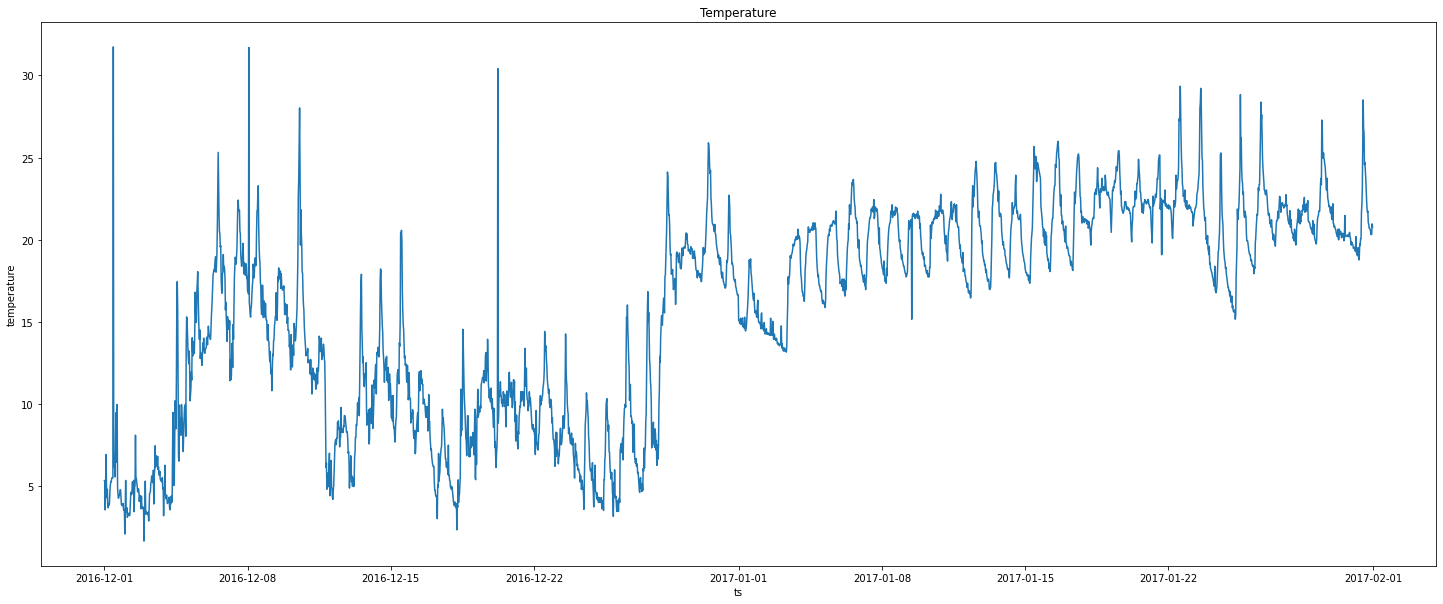

In [7]:
plt.figure(figsize=(25, 10))
sns.lineplot(x="ts", y="temperature", data=dst).set_title('Temperature')
plt.show()


### Using a filter (average per day) to remove outliers and noise
Let us compute the average temperature within the day

In [8]:
dst['filtered'] = np.nan
day = 0
while day < ndays:
	totday = 0.0
	for iv in range(0, SAMPLEPERDAY):
		t = dst.iloc[day*SAMPLEPERDAY + iv, 1]
		totday += t
	avgday = totday/(SAMPLEPERDAY)
	for iv in range(0, SAMPLEPERDAY):
		dst.at[day*SAMPLEPERDAY + iv, 'filtered'] = avgday
	day += 1


In [197]:
dst = dst[['ts','temperature','filtered']]
dst

,ts,temperature,filtered
0,2016-12-01 00:00:00,5.325,5.610521
1,2016-12-01 00:30:00,5.293,5.610521
2,2016-12-01 01:00:00,3.549,5.610521
3,2016-12-01 01:30:00,5.161,5.610521
4,2016-12-01 02:00:00,6.917,5.610521
...,...,...,...
2971,2017-01-31 21:30:00,20.320,21.216729
2972,2017-01-31 22:00:00,20.320,21.216729
2973,2017-01-31 22:30:00,20.320,21.216729
2974,2017-01-31 23:00:00,20.964,21.216729


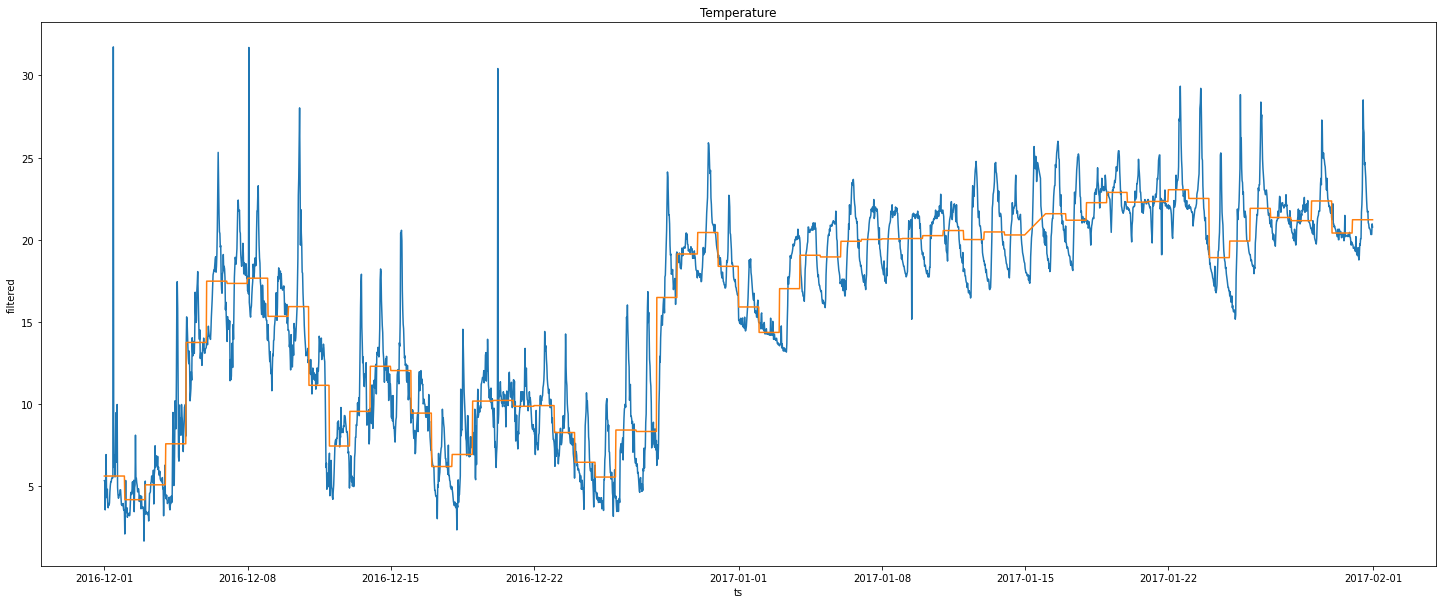

In [9]:
plt.figure(figsize=(25, 10))
sns.lineplot(x="ts", y="temperature", data=dst)
sns.lineplot(x="ts", y="filtered", data=dst).set_title('Temperature')
plt.show()

Since it is a common operation, there is a function to compute these values

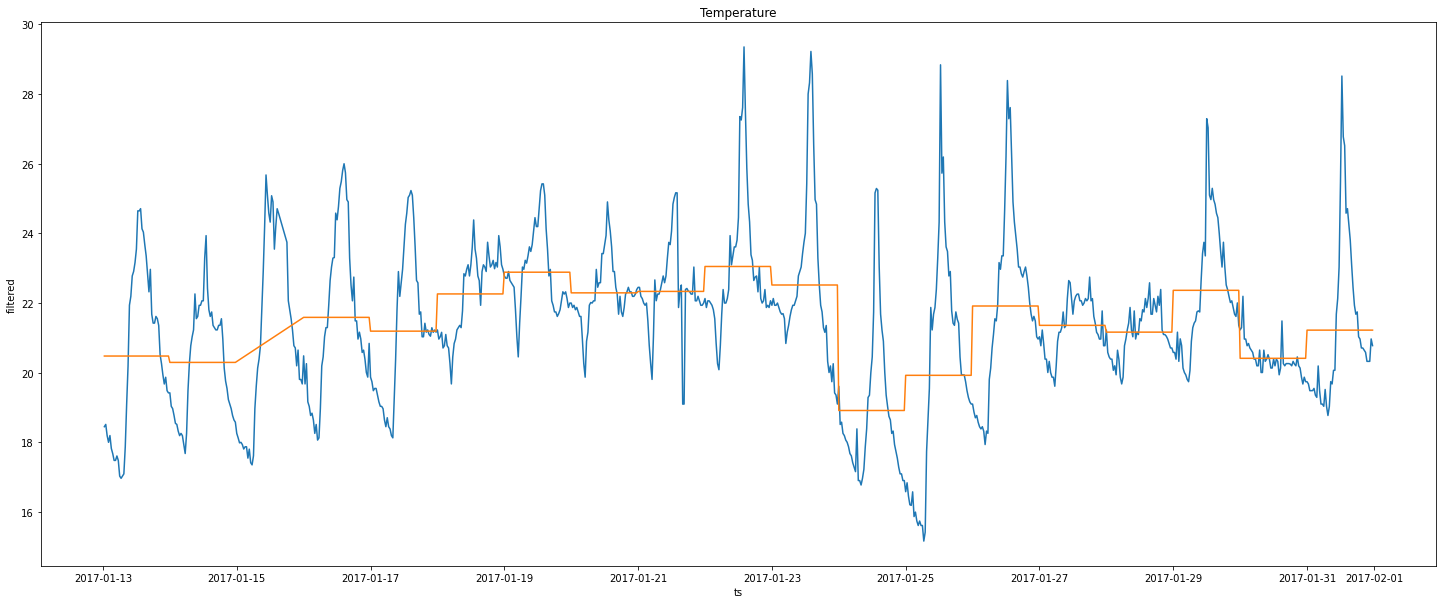

In [10]:
plt.figure(figsize=(25, 10))
sns.lineplot(x="ts", y="temperature", data=dst[dst.ts > '2017-01-13 00:00:00'])
sns.lineplot(x="ts", y="filtered", data=dst[dst.ts > '2017-01-13 00:00:00']).set_title('Temperature')
plt.show()

In [11]:
dst[(dst.ts >= '2017-01-15') & (dst.ts <= '2017-01-16')]

,ts,temperature,filtered
2160,2017-01-15 00:00:00,18.252,NaN
2161,2017-01-15 00:30:00,18.124,NaN
2162,2017-01-15 01:00:00,17.980,NaN
2163,2017-01-15 01:30:00,17.996,NaN
2164,2017-01-15 02:00:00,17.932,NaN
2165,2017-01-15 02:30:00,17.804,NaN
2166,2017-01-15 03:00:00,17.868,NaN
2167,2017-01-15 03:30:00,17.868,NaN
2168,2017-01-15 04:00:00,17.542,NaN
2169,2017-01-15 04:30:00,17.800,NaN


**Fixing missing values with a careful average computation**

In [12]:
dst['filtered'] = np.nan
day = 0
while day < ndays:
	totday = 0.0
	dec = 0
	for iv in range(0, SAMPLEPERDAY):
		t = dst.iloc[day*SAMPLEPERDAY + iv, 1]
		if pd.isna(t):
			dec += 1 #decrement the number of samples
		else:
			totday += t
	avgday = totday/(SAMPLEPERDAY - dec)
	for iv in range(0, SAMPLEPERDAY):
		dst.at[day*SAMPLEPERDAY + iv, 'filtered'] = avgday
	day += 1

In [13]:
dst[(dst.ts >= '2017-01-15') & (dst.ts <= '2017-01-16')]

,ts,temperature,filtered
2160,2017-01-15 00:00:00,18.252,20.905326
2161,2017-01-15 00:30:00,18.124,20.905326
2162,2017-01-15 01:00:00,17.980,20.905326
2163,2017-01-15 01:30:00,17.996,20.905326
2164,2017-01-15 02:00:00,17.932,20.905326
2165,2017-01-15 02:30:00,17.804,20.905326
2166,2017-01-15 03:00:00,17.868,20.905326
2167,2017-01-15 03:30:00,17.868,20.905326
2168,2017-01-15 04:00:00,17.542,20.905326
2169,2017-01-15 04:30:00,17.800,20.905326


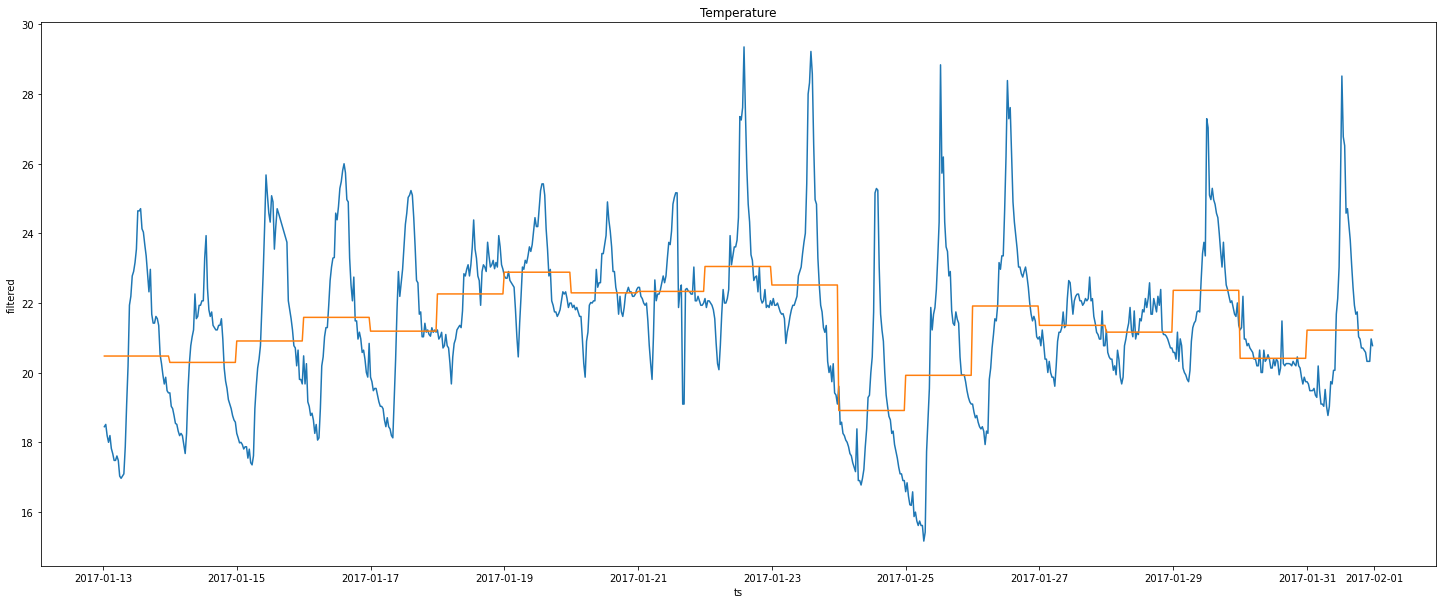

In [14]:
plt.figure(figsize=(25, 10))
sns.lineplot(x="ts", y="temperature", data=dst[dst.ts > '2017-01-13 00:00:00'])
sns.lineplot(x="ts", y="filtered", data=dst[dst.ts > '2017-01-13 00:00:00']).set_title('Temperature')
plt.show()

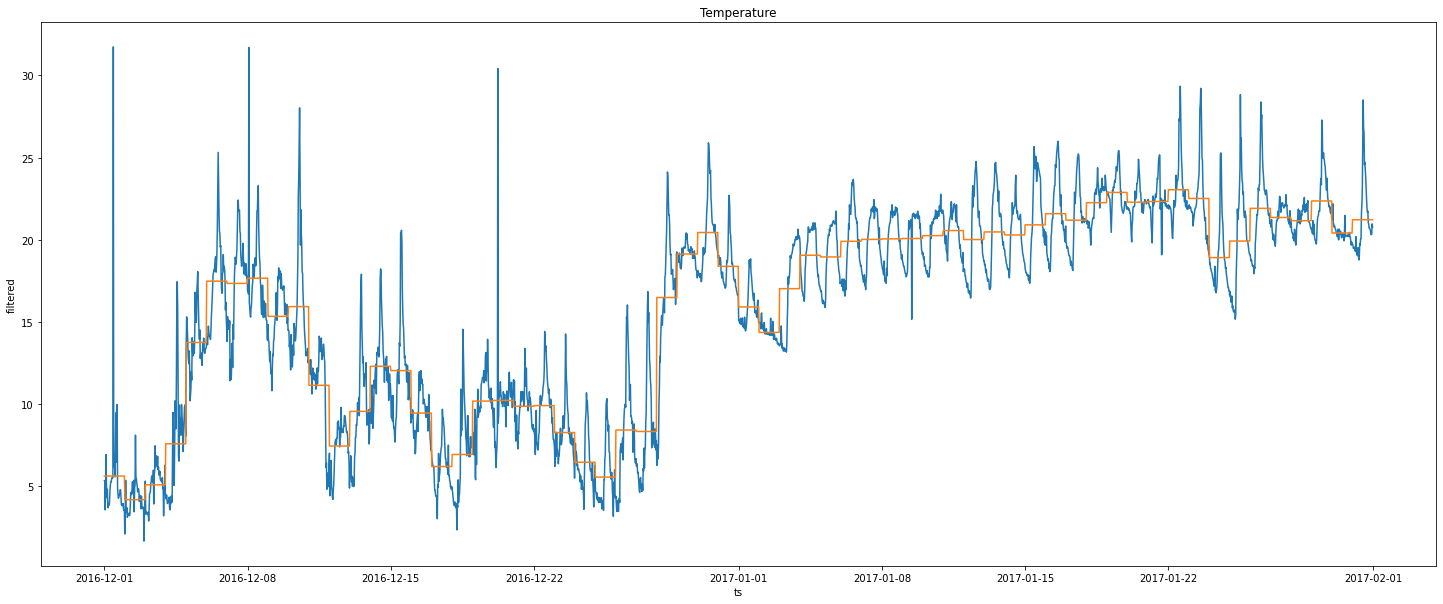

In [15]:
plt.figure(figsize=(25, 10))
sns.lineplot(x="ts", y="temperature", data=dst)
sns.lineplot(x="ts", y="filtered", data=dst).set_title('Temperature')
plt.show()


In [214]:
dup = dst[:]
dup

,ts,temperature,filtered
0,2016-12-01 00:00:00,5.325,5.610521
1,2016-12-01 00:30:00,5.293,5.610521
2,2016-12-01 01:00:00,3.549,5.610521
3,2016-12-01 01:30:00,5.161,5.610521
4,2016-12-01 02:00:00,6.917,5.610521
...,...,...,...
2971,2017-01-31 21:30:00,20.320,21.216729
2972,2017-01-31 22:00:00,20.320,21.216729
2973,2017-01-31 22:30:00,20.320,21.216729
2974,2017-01-31 23:00:00,20.964,21.216729


In [18]:
dup = dst[:]
dup
dup['filtered_bi'] = dup.iloc[:,1].rolling(window=SAMPLEPERDAY).mean()


<ipython-input-18-0fed26db0766>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dup['filtered_bi'] = dup.iloc[:,1].rolling(window=SAMPLEPERDAY).mean()


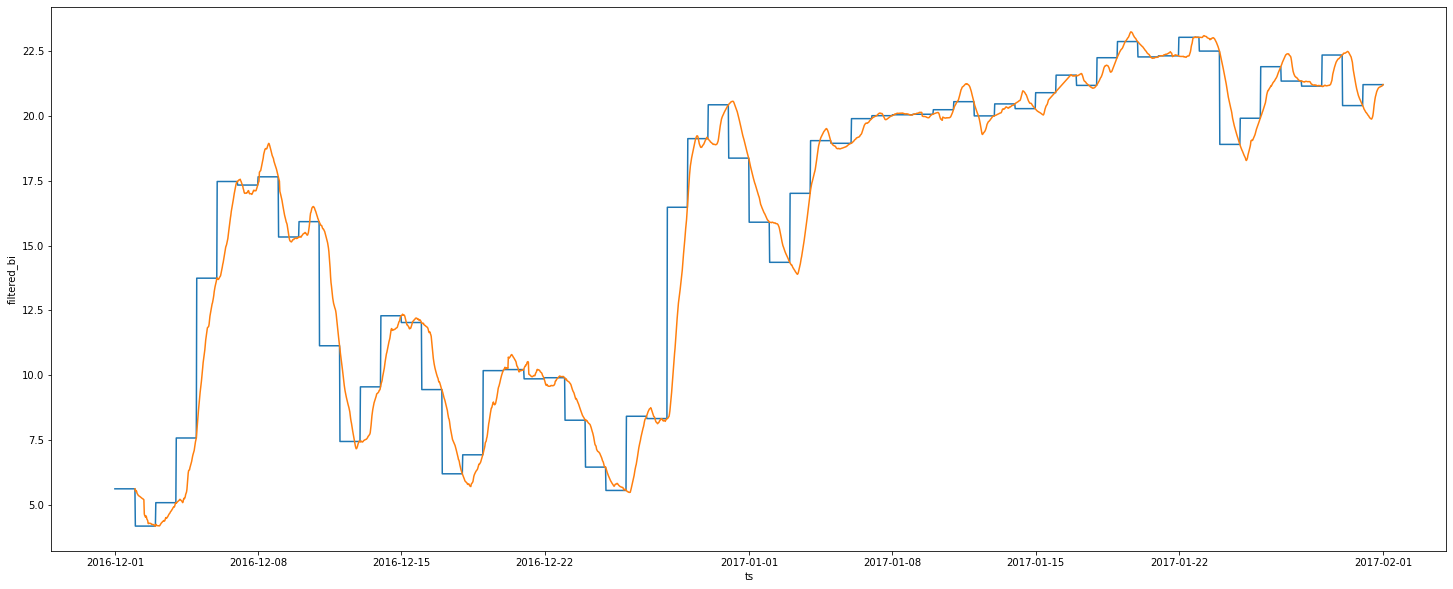

In [20]:
plt.figure(figsize=(25, 10))

#sns.lineplot(x="ts", y="temperature", data=dup)
sns.lineplot(x="ts", y="filtered", data=dup)
sns.lineplot(x="ts", y="filtered_bi", data=dup)
plt.show()

In [219]:
dst['day'] = dst['ts'].dt.day
dst

,ts,temperature,filtered,day
0,2016-12-01 00:00:00,5.325,5.610521,1
1,2016-12-01 00:30:00,5.293,5.610521,1
2,2016-12-01 01:00:00,3.549,5.610521,1
3,2016-12-01 01:30:00,5.161,5.610521,1
4,2016-12-01 02:00:00,6.917,5.610521,1
...,...,...,...,...
2971,2017-01-31 21:30:00,20.320,21.216729,31
2972,2017-01-31 22:00:00,20.320,21.216729,31
2973,2017-01-31 22:30:00,20.320,21.216729,31
2974,2017-01-31 23:00:00,20.964,21.216729,31


In [23]:
dst['month'] = dst['ts'].dt.month
dst

,ts,temperature,filtered,DM,month
0,2016-12-01 00:00:00,5.325,5.610521,01-12,12
1,2016-12-01 00:30:00,5.293,5.610521,01-12,12
2,2016-12-01 01:00:00,3.549,5.610521,01-12,12
3,2016-12-01 01:30:00,5.161,5.610521,01-12,12
4,2016-12-01 02:00:00,6.917,5.610521,01-12,12
...,...,...,...,...,...
2971,2017-01-31 21:30:00,20.320,21.216729,31-01,1
2972,2017-01-31 22:00:00,20.320,21.216729,31-01,1
2973,2017-01-31 22:30:00,20.320,21.216729,31-01,1
2974,2017-01-31 23:00:00,20.964,21.216729,31-01,1


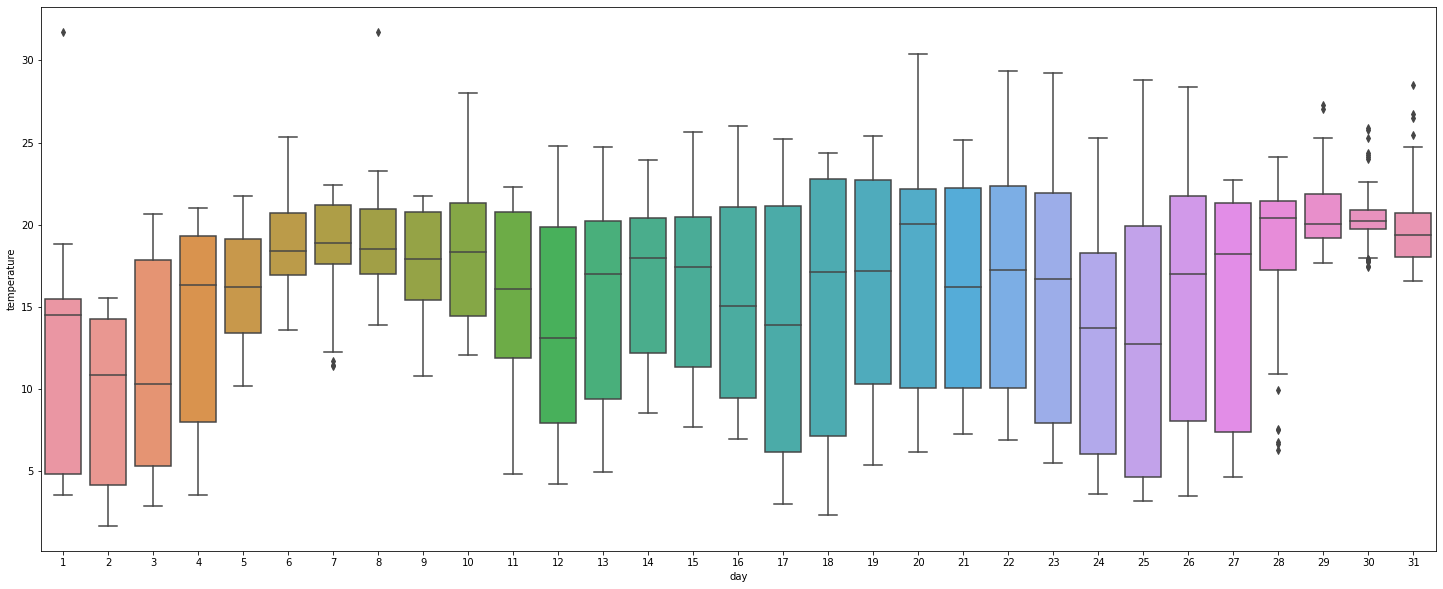

In [222]:
plt.figure(figsize=(25, 10))

sns.boxplot(x="day", y="temperature", data=dst)
plt.show()

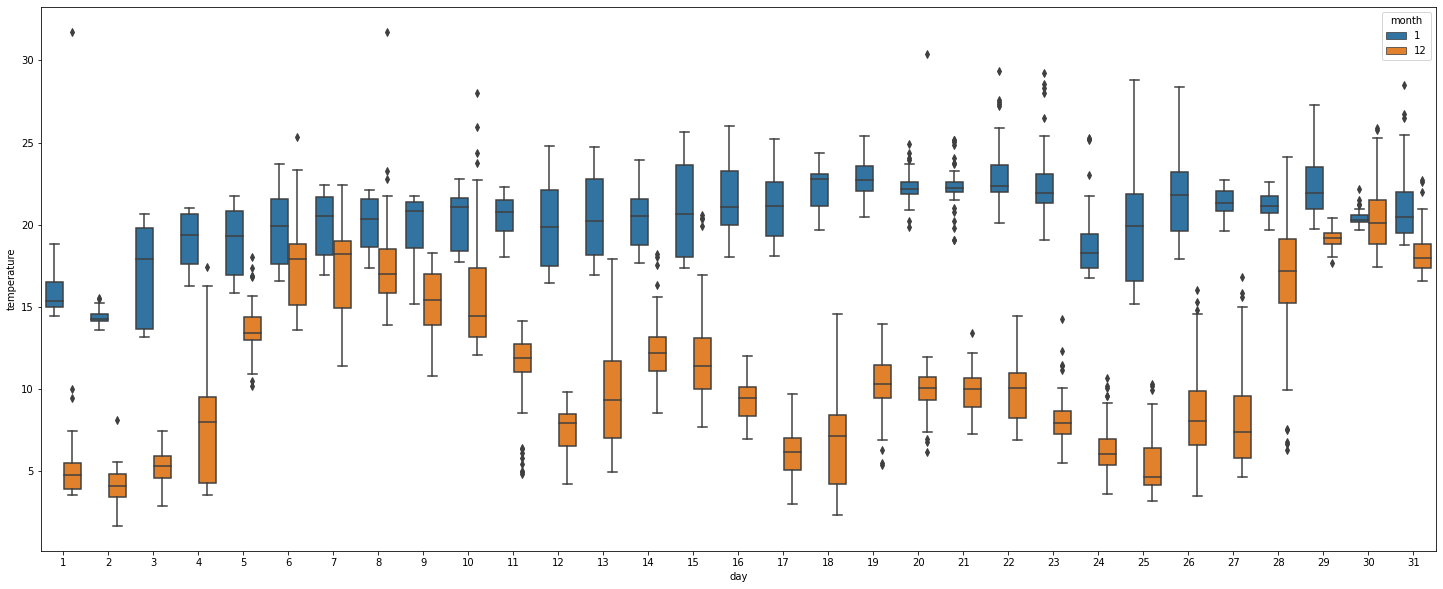

In [223]:
plt.figure(figsize=(25, 10))

sns.boxplot(x="day", y="temperature", hue="month", data=dst)
plt.show()

In [21]:
dst['DM'] = dst.ts.apply(lambda x: x.strftime('%d-%m')) 
dst

,ts,temperature,filtered,DM
0,2016-12-01 00:00:00,5.325,5.610521,01-12
1,2016-12-01 00:30:00,5.293,5.610521,01-12
2,2016-12-01 01:00:00,3.549,5.610521,01-12
3,2016-12-01 01:30:00,5.161,5.610521,01-12
4,2016-12-01 02:00:00,6.917,5.610521,01-12
...,...,...,...,...
2971,2017-01-31 21:30:00,20.320,21.216729,31-01
2972,2017-01-31 22:00:00,20.320,21.216729,31-01
2973,2017-01-31 22:30:00,20.320,21.216729,31-01
2974,2017-01-31 23:00:00,20.964,21.216729,31-01


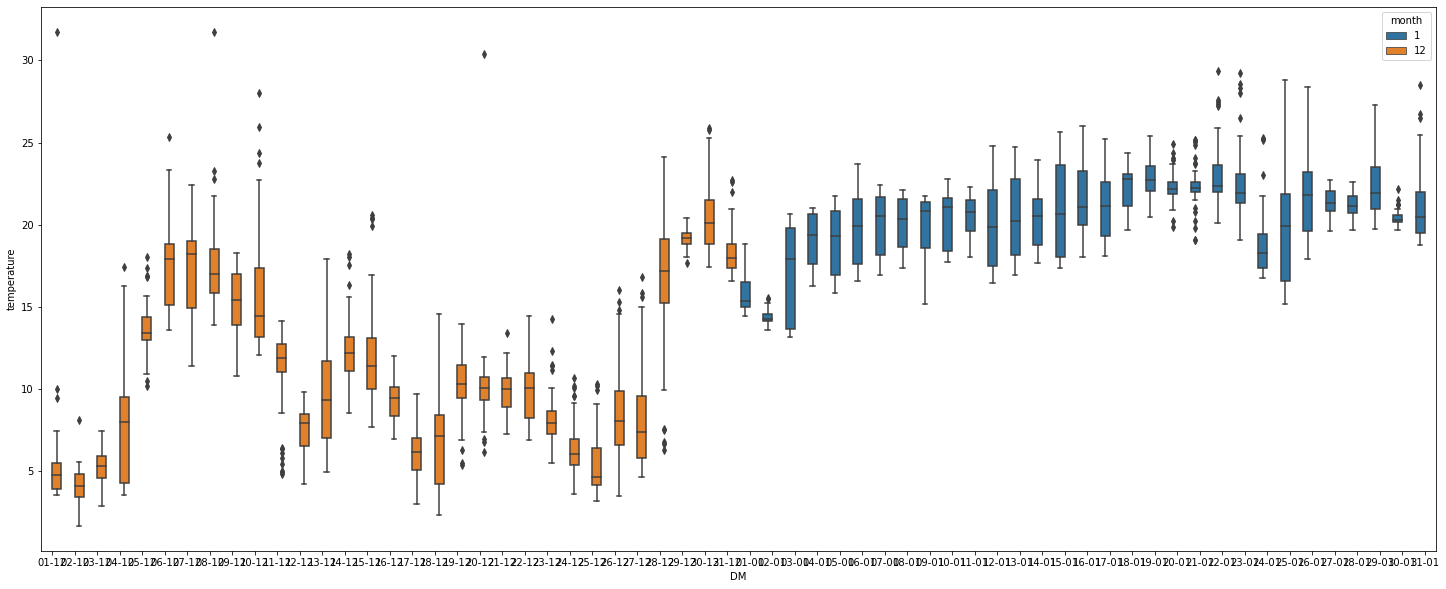

In [24]:
plt.figure(figsize=(25, 10))

sns.boxplot(x="DM", y="temperature", hue="month", data=dst)
plt.show()

## Additional popular packages
+ **numpy**: scientific computing with Python - mathematical functions, random number generators, linear algebra routines, Fourier transforms, and more. [https://numpy.org/](https://numpy.org/)
+ **scipy**: software for mathematics, science, and engineering  [https://scipy.org/](https://scipy.org/)

In [103]:
import numpy as np

timestamps = np.arange(fday, lday, datetime.timedelta(0, SAMPLEFREQ))
timestamps


df.merge(how='right', on='A', right = pd.DataFrame({'A':np.arange(df.iloc[0]['A'], df.iloc[-1]['A'] + 0.5, 0.5)})).sort(columns='A').reset_index().drop(['index'], axis=1)

array(['2016-12-01T00:00:00.000000', '2016-12-01T00:30:00.000000',
       '2016-12-01T01:00:00.000000', ..., '2017-01-31T22:00:00.000000',
       '2017-01-31T22:30:00.000000', '2017-01-31T23:00:00.000000'],
      dtype='datetime64[us]')